In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
invoice_opportunities = pd.read_excel("shared_data_read_only/Invoice and Opportunities.xlsx")
invoice_opportunities = invoice_opportunities.set_index("Date")
invoice_opportunities.sort_index(inplace=True)
month_invoices = invoice_opportunities.groupby([lambda x: x.month]).mean()
month_invoices

,Amount,Opportunity ID
Date,,
1,19105.869845,3301.371134
2,29962.622138,2973.886792
3,23498.212151,2806.490040
4,15504.224644,3664.887640
5,9256.117179,3272.396197
6,13374.709284,3442.335802
7,23752.204491,3418.105263
8,24015.359219,3545.992188
9,24157.332198,3714.538793


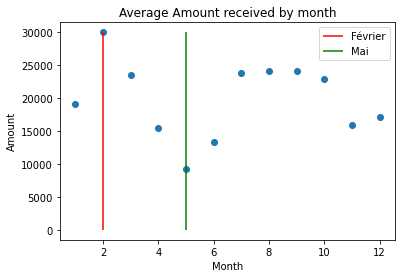

In [27]:
plt.scatter(month_invoices.index, month_invoices["Amount"])
plt.title("Average Amount received by month")
plt.vlines(x = 2, ymin = 0, ymax = max(month_invoices["Amount"]), colors = 'red',label = 'Février')
plt.vlines(x = 5, ymin = 0, ymax = max(month_invoices["Amount"]), colors = 'green',label = 'Mai')
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()

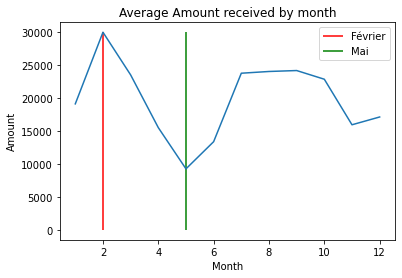

In [28]:
plt.plot(month_invoices.index, month_invoices["Amount"])
plt.vlines(x = 2, ymin = 0, ymax = max(month_invoices["Amount"]), colors = 'red',label = 'Février')
plt.vlines(x = 5, ymin = 0, ymax = max(month_invoices["Amount"]), colors = 'green',label = 'Mai')
plt.title("Average Amount received by month")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()

Text(0.5, 1.0, 'Distribution of the Average Amount received by month')

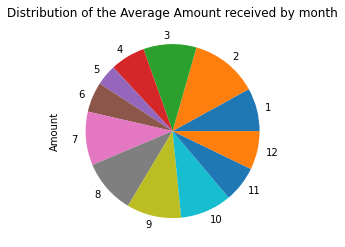

In [29]:
month_invoices["Amount"].plot.pie()
plt.title("Distribution of the Average Amount received by month")

Meilleur mois en moyenne Février. Pire en Mai. Assez constant et haut en été probablement graçe aux nombreuses actvités proposées l'été.

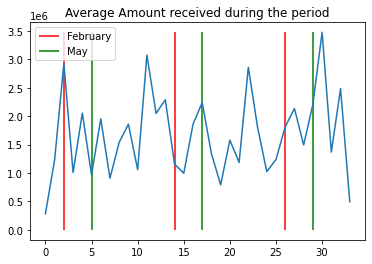

In [41]:
month_year_invoices = invoice_opportunities.groupby([lambda x: x.year, lambda x: x.month]).sum()[5:]
plt.plot(month_year_invoices["Amount"].values)
plt.title("Average Amount received during the period")
plt.vlines(x = 2, ymin = 0, ymax = max(month_year_invoices["Amount"]), colors = 'red',label = 'February')
plt.vlines(x = 5, ymin = 0, ymax = max(month_year_invoices["Amount"]), colors = 'green',label = 'May')
for i in range(2):
    plt.vlines(x = 2+ 12*(i+1), ymin = 0, ymax = max(month_year_invoices["Amount"]), colors = 'red')
    plt.vlines(x = 5+ 12*(i+1), ymin = 0, ymax = max(month_year_invoices["Amount"]), colors = 'green')
plt.legend()

In [42]:
invoice_opportunities = pd.read_excel("shared_data_read_only/Invoice and Opportunities.xlsx")
invoice_opportunities = invoice_opportunities.set_index("Date")
invoice_opportunities.sort_index(inplace=True)
month_invoices_nb = invoice_opportunities.groupby([lambda x: x.month]).count()
month_invoices_nb

,Type,Reference Nbr.,Customer,Amount,Opportunity ID
Date,,,,,
1,194,194,194,194,194
2,159,159,159,159,159
3,251,251,251,251,251
4,267,267,267,267,267
5,631,631,631,631,631
6,405,405,405,405,405
7,285,285,285,285,285
8,128,128,128,128,128
9,232,232,232,232,232


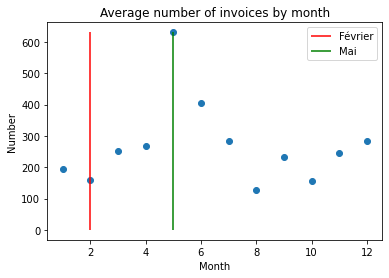

In [43]:
plt.scatter(month_invoices_nb.index, month_invoices_nb["Amount"])
plt.title("Average number of invoices by month")
plt.vlines(x = 2, ymin = 0, ymax = max(month_invoices_nb["Amount"]), colors = 'red',label = 'Février')
plt.vlines(x = 5, ymin = 0, ymax = max(month_invoices_nb["Amount"]), colors = 'green',label = 'Mai')
plt.xlabel("Month")
plt.ylabel("Number")
plt.legend()

Inversement proportionnel au montant moyen reçu par mois

Text(0, 0.5, 'Scale quantity')

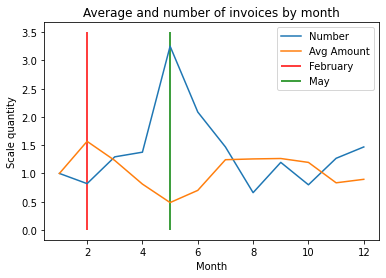

In [44]:
plt.plot(month_invoices_nb.index, month_invoices_nb["Amount"]/month_invoices_nb["Amount"].values[0], label="Number")
plt.vlines(x = 2, ymin = 0, ymax = 3.5, colors = 'red',label = 'February')
plt.vlines(x = 5, ymin = 0, ymax = 3.5, colors = 'green',label = 'May')
plt.title("Average and number of invoices by month")
plt.plot(month_invoices.index, month_invoices["Amount"]/month_invoices["Amount"].values[0], label="Avg Amount")
plt.legend()
plt.xlabel("Month")
plt.ylabel("Scale quantity")

In [45]:
invoice_opportunities = pd.read_excel("shared_data_read_only/Invoice and Opportunities.xlsx")
invoice_opportunities

,Type,Reference Nbr.,Customer,Amount,Date,Opportunity ID
0,Invoice,FC0004608,C06507,5000.00,2023-10-10,4504
1,Invoice,FC0004607,C01388,241253.00,2023-10-09,1863
2,Invoice,FC0004605,C19104,83954.00,2023-10-06,5708
3,Invoice,FC0004600,C10528,3000.00,2023-06-23,5617
4,Invoice,FC0004598,C01196,54531.00,2023-10-09,5829
...,...,...,...,...,...,...
3233,Invoice,FC0000008,C00087,5000.00,2021-03-11,1410
3234,Invoice,FC0000007,C00589,3000.00,2020-03-29,1056
3235,Invoice,FC0000005,C00644,4504.95,2021-03-15,1499
3236,Invoice,FC0000004,C00644,455.37,2021-03-15,1495


In [46]:
business_account = pd.read_excel("shared_data_read_only/Business Account.xlsx")
business_account = business_account.rename(columns={"Business Account": "Customer"})
#business_account = business_account.set_index("Customer")
merged = business_account.merge(invoice_opportunities, on="Customer")
best_sector = merged.groupby(['Activity sector']).mean()["Amount"]
best_sector

Activity sector
AGRI-FOOD - Food                                                               19068.658667
ARCHITECTURE - LANDSCAPE - URBAN PLANNING                                       6796.876923
ARMY - SECURITY - Security, Surveillance                                        5168.411429
BTP - Construction                                                             13871.763578
BUSINESS ADMINISTRATION - Consulting, Audit, Accounting                         7980.030909
COMMERCE - Retail, Other retail, Crafts                                         7966.051961
COMMUNICATION - Marketing, Advertising, Communication                           2339.195185
COMPUTING - TELECOM - Networks                                                 20325.177600
COMPUTING - TELECOM - Video games, Internet, E-Commerce                        17223.545443
CUSTOMER RELATIONS - Trade, distribution                                       20800.000000
EDUCATION - RESEARCH - Education                                

In [47]:
best_sector = best_sector.sort_values()
best_sector

Activity sector
INDUSTRIES - Desktop publishing, printing                                        140.868000
ENERGY - ENVIRONMENT - Waste management, recycling                              2171.652500
COMMUNICATION - Marketing, Advertising, Communication                           2339.195185
INDUSTRIES - Maintenance                                                        2536.057143
INDUSTRIES - Mechanics, Armament                                                3125.000000
PUBLIC SECTOR - Other Public Partnership Structures                             3216.543750
REAL ESTATE - Architecture, Real Estate                                         3318.155493
HR - RECRUITMENT - Recruitment agency, Interim, Training                        4067.241034
HOTEL - CATERING - TOURISM                                                      4999.965246
INDUSTRIES - Electronics                                                        5000.000000
ARMY - SECURITY - Security, Surveillance                        

In [48]:
top_best_sector = best_sector[-10:]
#a = pd.Series([np.sum(best_sector.values) - np.sum(top_best_sector)], index=["OTHERS"])
#top_best_sector = top_best_sector.add(a)
top_best_sector

Activity sector
INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds    24425.931371
INDUSTRIES - Chemical industry                                         24576.590698
MAINTENANCE - HYGIENE - BEAUTY                                         31797.125000
PUBLIC SECTOR - Local authorities, Regions, Municipalities             32093.096422
INDUSTRIES - Aircraft, railway, shipbuilding                           38384.615385
INDUSTRIES - Fashion, Textiles, Leather, Clothing                      45392.211194
HEALTH - SOCIAL - Social, Associations, Foundations                    47320.961026
INDUSTRIES - Food industry                                             47326.946800
INDUSTRIES - Luxury goods                                              52601.971667
SECTEUR PUBLIC - Etat & ses établissements publics                     58460.852414
Name: Amount, dtype: float64

<AxesSubplot:title={'center':'Sectors that pay the most'}>

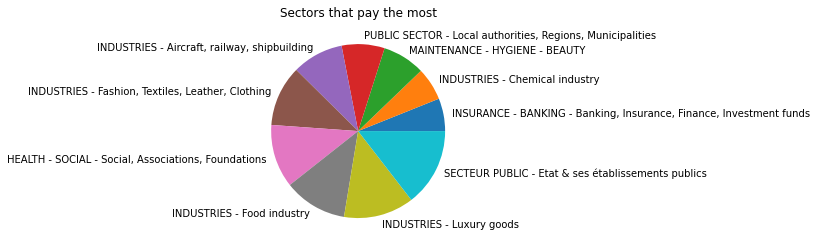

In [49]:
plt.title("Sectors that pay the most")
top_best_sector.plot.pie(ylabel = "")

In [50]:
print(np.sum(best_sector.values) - np.sum(top_best_sector))

335304.76099946874


In [51]:
contacts = pd.read_excel("shared_data_read_only/Contacts.xlsx")
contacts = contacts.rename(columns={"Business Account": "Customer"})
merged = invoice_opportunities.merge(contacts, on="Customer")
best_country = merged.groupby(['Country Name']).mean()["Amount"]
best_country = best_country.sort_values()
best_country

Country Name
Portugal                                                 7620.000000
Belgium                                                 20000.000000
Italy                                                   20000.000000
Luxembourg                                              25000.000000
France                                                  25826.923806
United States of America                                27680.001705
Switzerland                                             46339.834000
United Kingdom of Great Britain and Northern Ireland    49603.893500
Name: Amount, dtype: float64

<AxesSubplot:title={'center':'Country of clients that pay the most'}>

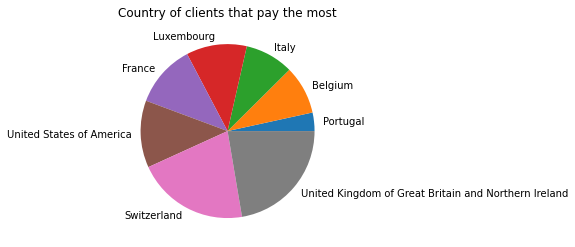

In [52]:
plt.title("Country of clients that pay the most")
best_country.plot.pie(ylabel = "")

In [53]:
opportunities = pd.read_excel("shared_data_read_only/Opportunities.xlsx")
business_account = pd.read_excel("shared_data_read_only/Business Account.xlsx")
merged = business_account.merge(opportunities, on="Business Account")
confident_sector = merged.groupby(['Activity sector']).mean()["Difference"]
confident_sector = confident_sector.sort_values()
print(confident_sector)

Activity sector
HEALTH - SOCIAL - Social, Associations, Foundations                           -66935.051595
SECTEUR PUBLIC - Etat & ses établissements publics                            -57853.531279
INDUSTRIES - Food industry                                                    -49909.090909
INDUSTRIES - Luxury goods                                                     -43922.954545
INDUSTRIES - Aircraft, railway, shipbuilding                                  -42527.020690
INDUSTRIES - Fashion, Textiles, Leather, Clothing                             -35973.214683
PUBLIC SECTOR - Local authorities, Regions, Municipalities                    -30517.176573
MEDIA - ARTS - SPORTS - Arts, Culture, Leisure, Entertainment, Random Games   -27072.871233
MEDIA - ARTS - SPORTS - Sports, Infrastructure, Clubs                         -23219.979889
CUSTOMER RELATIONS - Trade, distribution                                      -22850.285714
INSURANCE - BANKING - Banking, Insurance, Finance, Investment fu

In [54]:
most_confident_sector = np.abs(confident_sector[-10:])
most_confident_sector

Activity sector
REAL ESTATE - Architecture, Real Estate                  2910.243333
INDUSTRIES - Mechanics, Armament                         2573.888889
ARMY - SECURITY - Security, Surveillance                 2515.428571
ARCHITECTURE - LANDSCAPE - URBAN PLANNING                2342.311111
INDUSTRIES - Glass, concrete, ceramics                   2217.676296
COMMUNICATION - Marketing, Advertising, Communication    1547.548387
INDUSTRIES - Electronics                                 1382.866667
LAW - ECONOMICS - MANAGEMENT - Law, justice              1301.842105
INDUSTRIES - Maintenance                                  663.022222
INDUSTRIES - Desktop publishing, printing                  53.000000
Name: Difference, dtype: float64

<AxesSubplot:title={'center':'Most confident sectors'}>

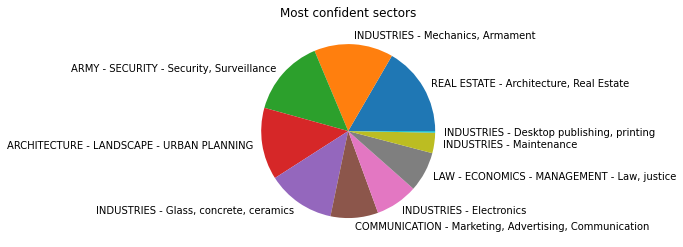

In [55]:
plt.title("Most confident sectors")
most_confident_sector.plot.pie(ylabel = "")

In [56]:
score_sector = best_sector / abs(confident_sector)
score_sector = score_sector.sort_values().dropna()
best_score_sector = score_sector[-10:]
best_score_sector = best_score_sector.rename({"None" : ""})
best_score_sector

Activity sector
COMPUTING - TELECOM - Networks                             2.476841
INDUSTRIES - Desktop publishing, printing                  2.657887
ARCHITECTURE - LANDSCAPE - URBAN PLANNING                  2.901782
INDUSTRIES - Electronics                                   3.615678
INDUSTRIES - Maintenance                                   3.824996
COMPUTING - TELECOM - Video games, Internet, E-Commerce    4.172918
LAW - ECONOMICS - MANAGEMENT - Law, justice                4.509113
MAINTENANCE - HYGIENE - BEAUTY                             5.478747
INDUSTRIES - Glass, concrete, ceramics                     5.544275
INDUSTRIES - Paper, Cardboard, Plastics                    5.979746
dtype: float64

<AxesSubplot:title={'center':'Sectors with best quality scores'}>

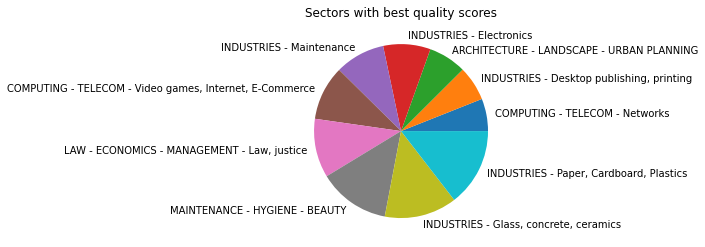

In [58]:
plt.title("Sectors with best quality scores")
best_score_sector.plot.pie(ylabel = "")